In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\Bros Jay Designs\Desktop\JUSTICE FILES\Datasets-main\DS\heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
#checking to see if there is any null values present in the dataset
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# checking if there is any duplicated row
data_dup = data.duplicated().any()
data_dup

True

In [5]:
#droping duplicates in the dataset
data = data.drop_duplicates()
data.duplicated().any()

False

In [6]:
# spliting categorical columns and numerical columns
category = []
numerical = []
for column in data.columns:
    if data[column].nunique() <= 10:
        category.append(column)
    else:
        numerical.append(column)
        

In [7]:
#encoding  categorical columns
category.remove('target')
category.remove('sex')


In [8]:
category

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [9]:
# creating binary vector for all categorical columns using dummy varibles
data= pd.get_dummies(data,columns= category,drop_first =True)

In [10]:
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1.5,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,44,0,108,141,175,0.6,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,52,1,128,255,161,0.0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,59,1,160,273,125,0.0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [11]:
#feature scaling for numerical columns(reduces the distance between columns) by putting it in the same scale
from sklearn.preprocessing import StandardScaler

In [12]:
st = StandardScaler()
data[numerical] = st.fit_transform(data[numerical])

In [13]:
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [14]:
#spliting the dataset into  training and testing
X = data.drop(['target'],axis = 1)
y = data['target']

In [15]:
#logistic regression
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [17]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [18]:
from sklearn.linear_model import LogisticRegression 

In [19]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [20]:
pred = log.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,pred)  

0.7868852459016393

In [23]:
from sklearn import svm

In [24]:
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [25]:
pred1 = svm.predict(X_test)

In [26]:
accuracy_score(y_test,pred1)

0.8032786885245902

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred2 = knn.predict(X_test)

In [29]:
accuracy_score(y_test,pred2)

0.7377049180327869

# non linear machine learning

In [30]:
#here prepoccesing is not required
data = pd.read_csv(r'C:\Users\Bros Jay Designs\Desktop\JUSTICE FILES\Datasets-main\DS\heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [31]:
data = data.drop_duplicates()

In [32]:
data = data.dropna()

In [33]:
data.shape

(302, 14)

In [34]:
X = data.drop('target',axis = 1)
y = data['target']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred3 = dt.predict(X_test)
accuracy_score(pred3,y_test)

0.7049180327868853

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred4 = rf.predict(X_test)
accuracy_score(y_test,pred4)

0.8524590163934426

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred5 = gbc.predict(X_test)
accuracy_score(pred5,y_test)

0.8032786885245902

In [40]:
import matplotlib.pyplot as plt

In [41]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                           'Acurracy':[accuracy_score(y_test,pred),
                                      accuracy_score(y_test,pred1),
                                      accuracy_score(y_test,pred2),
                                      accuracy_score(y_test,pred3),
                                      accuracy_score(y_test,pred4),
                                      accuracy_score(y_test,pred5),
                                    ]})

In [42]:
final_data

,Models,Acurracy
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.704918
4,RF,0.852459
5,GB,0.803279


<BarContainer object of 6 artists>

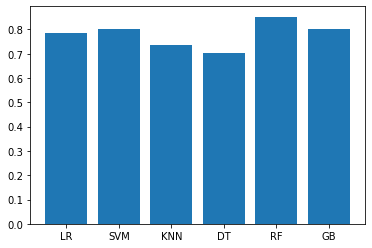

In [43]:
plt.bar(final_data.Models,final_data.Acurracy)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Acurracy'>

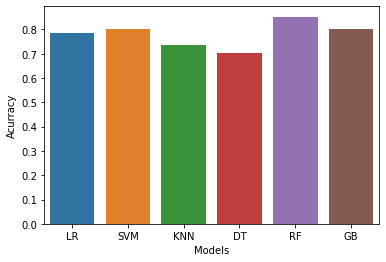

In [44]:
import seaborn as sns
sns.barplot(final_data.Models,final_data.Acurracy)

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
fpred = rf.predict(X_test)
accuracy_score(y_test,fpred)

0.8524590163934426

In [46]:
#IMPORTING NEW DATA AND TEST TO GET THE RESULT
new_data = pd.DataFrame({'age':45,
                        'sex':0,
                        'cp':0,
                        'trestbps':145,
                        'chol':125,
                        'fbs':0,
                        'restecg':1,
                        'thalach':168,
                        'exang':0,
                        'oldpeak':1.3,
                        'slope':2,
                        'ca':2,
                        'thal':3},index = [0])
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,45,0,0,145,125,0,1,168,0,1.3,2,2,3


In [47]:
pred_new_data = rf.predict(new_data)
pred_new_data
if pred_new_data[0] == 0:
    print('No Heart Disease')
else:
    print('you have an heart disease')

No Heart Disease


In [48]:
import joblib

In [49]:
joblib.dump(rf,'heart disease algorithm')

['heart disease algorithm']

In [50]:
model =  joblib.load('heart disease algorithm')
model.predict(new_data)

array([0], dtype=int64)

In [51]:
from  tkinter import *

In [52]:
master = Tk()
label = Label(master, text = "Heart Disease Prediction",bg = 'black',fg='white').grid(row = 0, columnspan = 3)


Label(master,text='Enter your Age ').grid(row=1)
Label(master,text='Male or Female [1/0]').grid(row=2)
Label(master,text='Enter Value of CP ').grid(row=3)
Label(master,text='Enter your Value of Trestbps ').grid(row=4)
Label(master,text='Enter your Value of chol ').grid(row=5)
Label(master,text='Enter your value of fbs ').grid(row=6)
Label(master,text='Enter your value of restecg ').grid(row=7)
Label(master,text='Enter your value of thalach ').grid(row=8)
Label(master,text='Enter your value of value exang ').grid(row=9)
Label(master,text='Enter your value of oldpeak ').grid(row=10)
Label(master,text='Enter your value of of slope ').grid(row=11)
Label(master,text='Enter your value pf ca ').grid(row=12)
Label(master,text='Enter your value of thal ').grid(row=13)


e1 = Entry(master)    
e1.grid(row =1,column = 1)
e2 = Entry(master)    
e2.grid(row =2,column = 1)
e3 = Entry(master)    
e3.grid(row =3,column = 1)
e4 = Entry(master)    
e4.grid(row =4,column = 1)
e5 = Entry(master)    
e5.grid(row =5,column = 1)
e6 = Entry(master)    
e6.grid(row =6,column = 1)
e7 = Entry(master)    
e7.grid(row =7,column = 1)
e8 = Entry(master)    
e8.grid(row =8,column = 1) 
e9 = Entry(master)    
e9.grid(row =9,column = 1)
e10 = Entry(master)    
e10.grid(row =10,column = 1)
e11 = Entry(master)    
e11.grid(row =11,column = 1)
e12 = Entry(master)    
e12.grid(row =12,column = 1)
e13 = Entry(master)    
e13.grid(row =13,column = 1)


def entry():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = int(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    

    model = joblib.load('heart disease algorithm')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    if result[0] == 0 or result == '0':
        state = 'Your are free of Heart Disease'
    else:
        state = 'You have an Heart Issue'
    Label(master, text = state).grid()
    

Button(master, text='predict',command = entry).grid()

mainloop()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
